# K-means

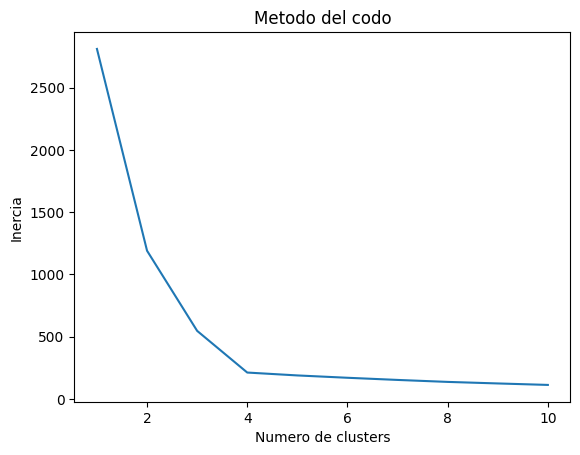

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

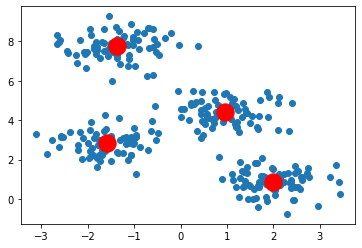

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Agglomerative Clustering

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


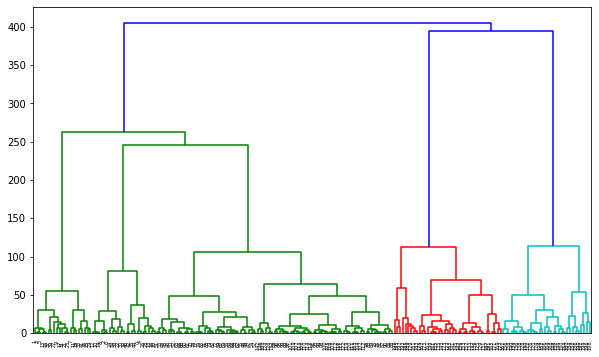

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

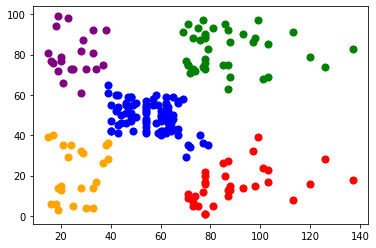

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

# DBSCAN

#. clusters estimado: 2
# puntos ruidosos: 0


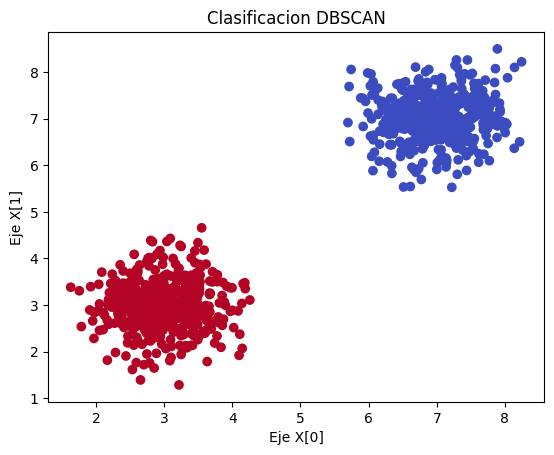

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
# Configuracion de datos y parametros
num_samples_total = 1000;
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0;min_samples = 13
# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)
# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

# Actividad Colaborativa

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
df.head(5)

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


In [ ]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
X = df.values
X_2= np.average(X,axis=0);X_3= np.std(X,axis=0)
df_n = pd.DataFrame();df_n['labels']=df.columns
df_n['Valores']=X_2;df_n['Sd']=X_3
df_n.index=df_n['labels']
df_n['Trim']=stats.trim_mean(X, 0.1)
df_n= df_n.drop(columns='labels')
df_n[['Valores', 'Sd','Trim']] = MinMaxScaler().fit_transform(df_n[['Valores', 'Sd','Trim']])
df_n

,Valores,Sd,Trim
labels,,,
MCD,0.077086,0.037153,0.078899
SBUX,0.024480,0.014914,0.023919
GOOG,0.705615,0.614485,0.668251
AMZN,1.000000,1.000000,1.000000
MSFT,0.058936,0.074416,0.055583
JPM,0.040301,0.023653,0.040679
BAC,0.000000,0.000000,0.000000
C,0.016929,0.003106,0.017896
MAR,0.046938,0.021447,0.049068


In [ ]:
feature_mtx=df_n.values
feature_mtx
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
import pylab
import scipy.cluster.hierarchy

Z = scipy.cluster.hierarchy.linkage(D, 'complete')
Z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



array([[9.00000000e+00, 1.00000000e+01, 2.26894708e-02, 2.00000000e+00],
       [5.00000000e+00, 8.00000000e+00, 3.08200009e-02, 2.00000000e+00],
       [4.00000000e+00, 1.30000000e+01, 3.88833638e-02, 2.00000000e+00],
       [0.00000000e+00, 1.10000000e+01, 4.89040408e-02, 2.00000000e+00],
       [1.00000000e+00, 7.00000000e+00, 5.30273136e-02, 2.00000000e+00],
       [1.40000000e+01, 1.50000000e+01, 7.35171368e-02, 4.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 9.64486055e-02, 4.00000000e+00],
       [6.00000000e+00, 1.80000000e+01, 1.31912776e-01, 3.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 2.05829402e-01, 8.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 2.90559137e-01, 1.10000000e+01],
       [1.20000000e+01, 2.30000000e+01, 4.18556906e-01, 1.20000000e+01],
       [2.00000000e+00, 3.00000000e+00, 2.18246642e+00, 2.00000000e+00],
       [2.40000000e+01, 2.50000000e+01, 5.87672395e+00, 1.40000000e+01]])

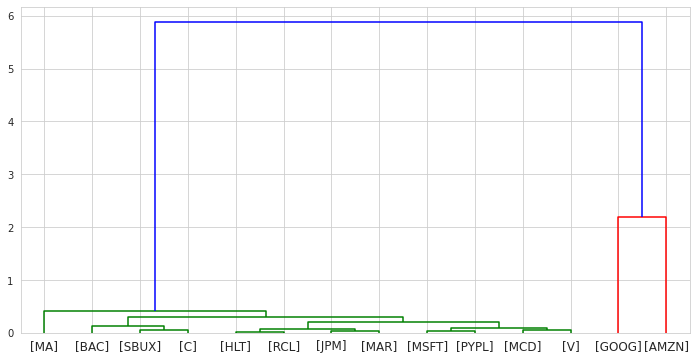

In [ ]:
fig = pylab.figure(figsize=(12,6))
def llf(id):
    return '[%s]' % (df_n.index[id] )

dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'top')

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
df_n['cluster_'] = agglom.labels_
df_n.head()

,Valores,Sd,Trim,cluster_
labels,,,,
MCD,0.077086,0.037153,0.078899,0
SBUX,0.024480,0.014914,0.023919,0
GOOG,0.705615,0.614485,0.668251,2
AMZN,1.000000,1.000000,1.000000,3
MSFT,0.058936,0.074416,0.055583,0


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



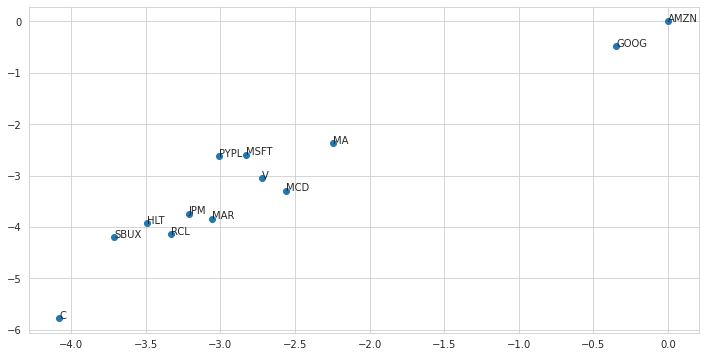

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(np.log(df_n.Valores), np.log(df_n.Sd))

for i, txt in enumerate(df_n.index):
  ax.annotate(txt, (np.log(df_n.Valores[i]), np.log(df_n.Sd[i])))

# PCA

Porcentaje de varianza explicada por cada componente
[0.62006039 0.24744129 0.0891408  0.04335752]


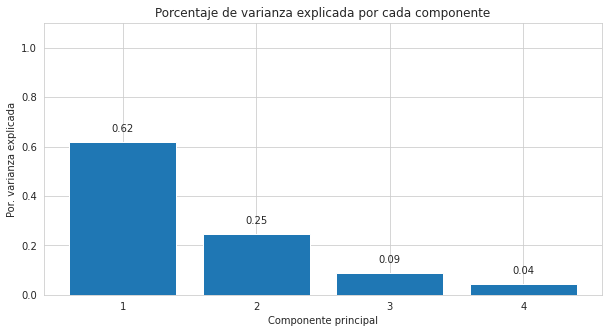

In [ ]:
# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0, 0.5, 'PC2')

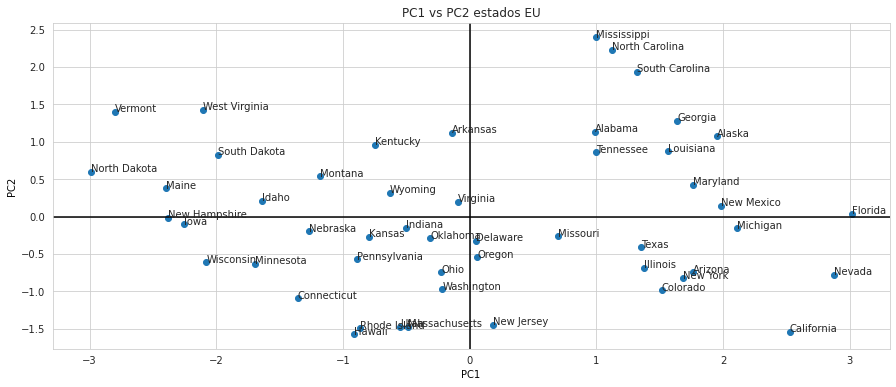

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))
label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black');plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU');plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')